### 3. Social Media Sentiment Analysis: 

This task involves analyzing sentiment from social media data. You'll explore techniques to extract, process, and analyze textual data from platforms like Twitter, Facebook, or Instagram. Your objective will be to classify user sentiments as positive, negative, or neutral, providing valuable insights for brand reputation management and market research.


In [63]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline

#### Train Data

In [70]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_orignal = train.copy()

In [71]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [72]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


#### Test Data

In [73]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original = test.copy()

In [74]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [75]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


#### Data Preprocessing

In [76]:
combined_data = train.append(test,ignore_index=True,sort=True)
combined_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [77]:
combined_data.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


#### Cleaning data

In [78]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern in the text and will put it in a list
    r = re.findall(pattern,text)
    
    # re.sub() will substitute all the @ with an empty character
    for i in r:
        text = re.sub(i,"",text)
        
    return text

#### Making a column for the cleaned Tweets
    We will use regex for and np.vectorize() for faster processing

In [79]:
combined_data['Cleaned_Tweets'] = np.vectorize(remove_pattern)(combined_data['tweet'],"@[\w]*")

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


#### Now remove special characters.

In [80]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].str.replace("[^a-zA-Z#]"," ")

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


#### Removing words with lesser than 3 words are removed.

In [81]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


#### Tokenization

In [82]:
tokenized_tweets = combined_data['Cleaned_Tweets'].apply(lambda x: x.split())

tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Cleaned_Tweets, dtype: object

#### Stemming

In [83]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Cleaned_Tweets, dtype: object

#### Now combine the data

In [85]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
    
combined_data['Clean_Tweets'] = tokenized_tweets
combined_data.head()

,id,label,tweet,Cleaned_Tweets,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,w h e n f a t h e r d y s f u n c t s e ...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,t h a n k # l y f t c r e d i t c a u s ...
2,3,0.0,bihday your majesty,bihday your majesty,b i h d a y y o u r m a j e s t i
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time,# m o d e l l o v e t a k e w i t h t ...
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,f a c t s g u i d s o c i e t i # m o t i v


#### EDA

In [88]:
# 1. word cloud


from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [89]:
# Storing all the non-sexist/racist words
positive_words = ' '.join(text for text in combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

In [90]:
# Generating images
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We will use the ImageColorGenerator to generate the color of the image
image_color = ImageColorGenerator(Mask)

# Now we will use the WordCloud function of the wordcloud library
wc = WordCloud(background_color='black',height=1500,width=4000,mask=Mask).generate(positive_words)

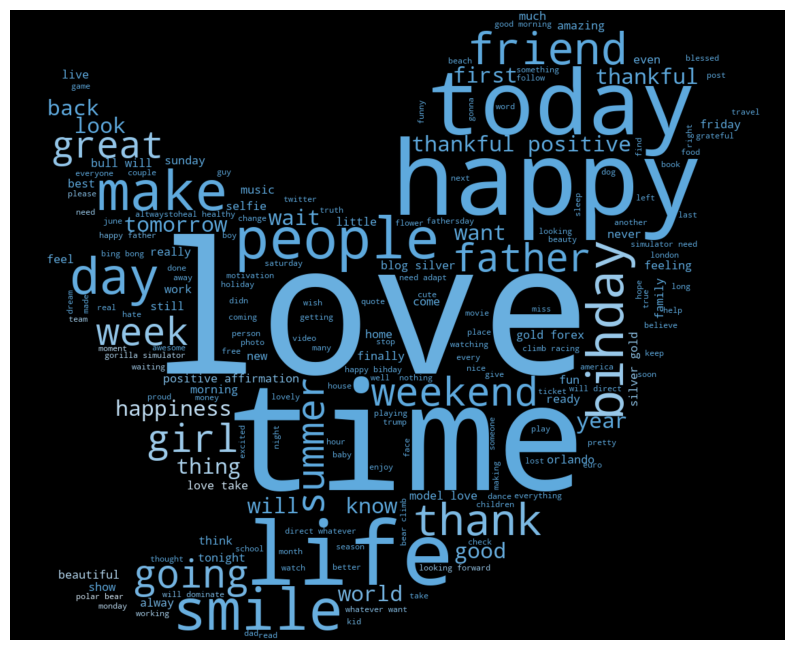

In [91]:
# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# interpolation is used to smooth the image generated

plt.imshow(wc.recolor(color_func=image_color),interpolation="hamming")

plt.axis('off')
plt.show()

In [92]:
# Label 1

negative_words = ' '.join(text for text in combined_data['Clean_Tweets'][combined_data['label'] == 1])

In [93]:

# Combining Image with Dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(negative_words)

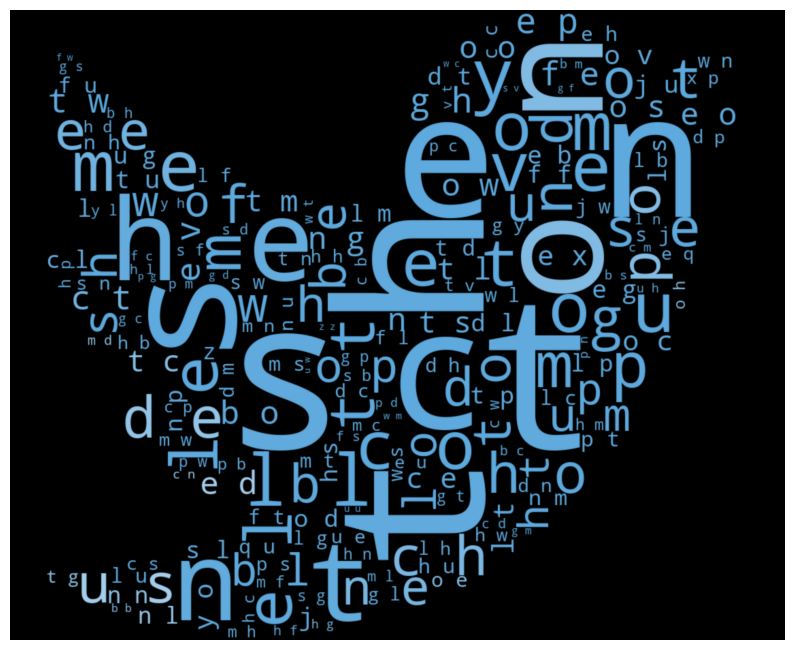

In [94]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

#### Hashtags from tweets

In [95]:
def extractHashtags(x):
    hashtags = []
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [96]:
positive_hashTags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

positive_hashTags

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['gettingfed'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 ['goodnight', 'badm

In [97]:
positive_hastags_unnested = sum(positive_hashTags,[])
positive_hastags_unnested

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 'gettingfed',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ri

In [98]:
negative_hashtags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 1])

In [99]:
negative_hashtags_unnest = (sum(negative_hashtags,[]))
negative_hashtags_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'med',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflict',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officer',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'praised',
 'cleveland',
 'rnc',
 'white',
 'tamirrice

#### Most frequent words

In [100]:
negative_word_freq = nltk.FreqDist(negative_hashtags_unnest)

negative_word_freq

FreqDist({'trump': 136, 'politics': 95, 'allahsoil': 92, 'libtard': 76, 'liberal': 75, 'sjw': 74, 'retweet': 63, 'miami': 46, 'black': 44, 'hate': 33, ...})

In [101]:
negative_df = pd.DataFrame({'Hashtags':list(negative_word_freq.keys()),'Count':list(negative_word_freq.values())})

negative_df

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1805,jumpedtheshark,1
1806,freemilo,5
1807,milo,4
1808,mailboxpride,1


#### Feature Extraction from Cleaned Tweets:
    Applying Bag of Words method to embed the data
    using Count Vectorizer package

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vecotrizer = CountVectorizer(max_df=0.90, min_df = 2, max_features = 1000, stop_words="english")

bow = bow_vecotrizer.fit_transform(combined_data['Cleaned_Tweets'])

bow_df = pd.DataFrame(bow.todense())

bow_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF Features:

Term-Frequency (TF):
The first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document. The Term Frequency is calculated as:
    
Inverse-Document Frequency (IDF):
The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears. The IDF is calulated as:

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

tfidf_matrix = tfidf.fit_transform(combined_data['Cleaned_Tweets'])

tfidf_df = pd.DataFrame(tfidf_matrix.todense())

tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [105]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

#### Train Test split

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
# bag of words

x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [108]:
# TF-IDF features

x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

In [110]:
# Logistic Regression

from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [111]:
log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [112]:
# Fitting

log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [113]:
predict_bow = log_Reg.predict_proba(x_valid_bow)
predict_bow

array([[9.46693148e-01, 5.33068524e-02],
       [9.99331240e-01, 6.68760178e-04],
       [9.11431840e-01, 8.85681599e-02],
       ...,
       [8.66007138e-01, 1.33992862e-01],
       [9.59865564e-01, 4.01344363e-02],
       [9.68593727e-01, 3.14062731e-02]])

In [115]:
# F1 score

# If prediction is more than or equal to 0.3 then 1 else 0
prediction_int = predict_bow[:,1] >=0.3

# Converting to integer type
prediction_int = prediction_int.astype(int)
prediction_int

# Calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.5318791946308725

In [116]:
# Fit TF-IDF features

log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [117]:
predict_tfidf = log_Reg.predict_proba(x_valid_tfidf)
predict_tfidf

array([[0.9818749 , 0.0181251 ],
       [0.96700536, 0.03299464],
       [0.94103467, 0.05896533],
       ...,
       [0.92937263, 0.07062737],
       [0.96564502, 0.03435498],
       [0.9881626 , 0.0118374 ]])

In [119]:
prediction_int = predict_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(int)
prediction_int

log_tfidf = f1_score(y_valid_tfidf,prediction_int)
log_tfidf

0.5582222222222222

In [121]:
# Predict the test data

test_tfidf = tfidf_matrix[31962:]
test_pred = log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

In [122]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


### Conclusion :

* Positive Label : 0
* Negative Label : 1